<a href="https://colab.research.google.com/github/Ramjeet-Dixit/IITM-AIML-Rdixit/blob/main/Weekend_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI vs ML vs DL

DL/Neural Network: Architecture: input layer, hidden layers, output layer

Nodes in input layer? no. of inputs
Nodes in output layer? no. of labels to be predicted
Nodes in hidden layer? assumption
32, 64, 128....
16, 32, 64, 128....

Working of human brain.

Neural Network is made up of two different processes:
1. Forward propagation/pass
2. backward propagation/pass

1 round of training = 1 FP + 1 BP

BP???

Image Classification model using neural networks

Two Libraries:

1. Tensorflow: keras; high level API built on top of tensorflow
Francious Chollet: Book on deep learning
Deep  learning book by Ian Goodfellow

It give us predefined methods to work or access the power of neural networks

2. Pytorch:
 library which uses functional programming of python

In [ ]:
import tensorflow as tf

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

Import the Fashion MNIST data

MNIST: images of hand written digits in greyscale

FashionMNIST: 70000 grayscale images in 10 categories

low resolution: 28 x 28 pixels

individual articles of clothing and related accessories

10 categories: in the form of index positions

Split of data: train and test, I will be uploading this data from keras cloud dataset library

60000 images : train

10000 images : test

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist #instantiate the data: fashion mnist

#4 arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #load the data in the environment

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


loading the dataset, are in the form of arrays

Images are in 28 x 28 px, the pixel values range form 0-255

In [ ]:
#60000 images in the train data with size 28 x 28 px: width and height
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
#10000 images are in the test data
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
type(train_images)
#each image is in the form array of pixel values
#0 - 255

numpy.ndarray

In [ ]:
train_images[0]#first image from train data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
#labels are available in the form of index positions: 0 - 9

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
class_names[9]

'Ankle Boot'

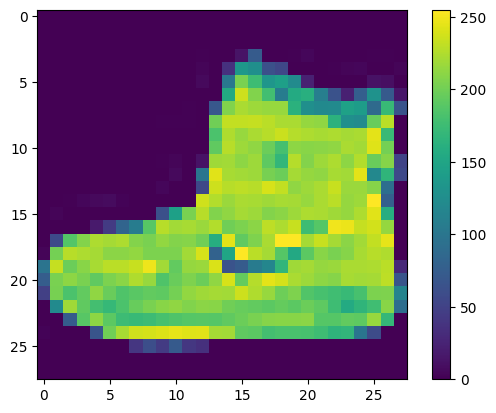

In [ ]:
#plot first image of the train data
#images that have been loaded are in the form of array of numbers(pixel values)
plt.figure()
plt.imshow(train_images[0])#converts array of pixels into an image
plt.colorbar()#represent the pixel range : 0-255
plt.grid(False)
plt.show()

every images is an array of pixel values ranging from 0-255

I need to normalize the pixel values 0 - 1

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

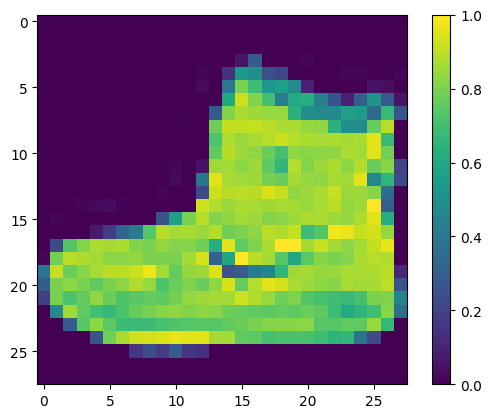

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()#represent the pixel range : 0-255
plt.grid(False)
plt.show()

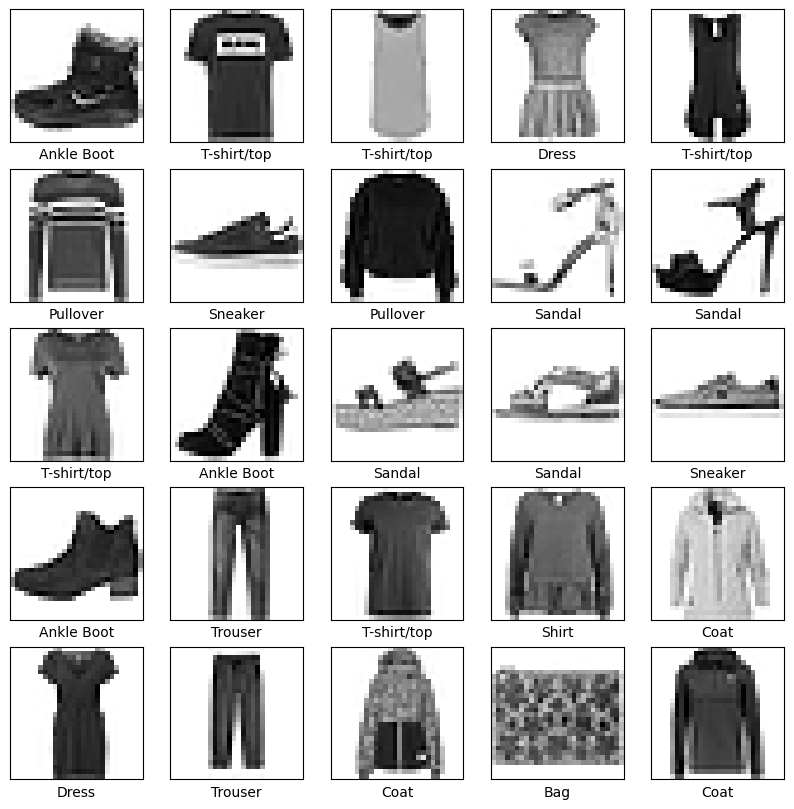

In [ ]:
#first 25 training images

plt.figure(figsize = (10,10))

for i in range(25):#0-24
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Build the neural network model**

Architecture made up of layers: input, hidden and output layer

tf.keras.layers.Dense

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
a
#flatten: converting an aray into single dimension

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
a.flatten()

array([1, 2, 3, 4, 5, 6])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#input layer
    tf.keras.layers.Dense(128, activation='relu'),#hidden layer with 128 nodes
    tf.keras.layers.Dense(10),#output layer with 10 nodes #predictions generated by output layer in form of array of numbers
    #tf.keras.layers.Softmax()
    ])
#tf.keras.layers.Softmax()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

images are in two dimension:height and width; 28 x 28 px

transform the images into one dimension: single row array: 28 x 28 = 784 px

For crossentropy loss computations the predictions generated by the output layer needs to be in the form of array of probabilities.

crossentropy loss = actual p -

from_logits = true, makes sure that the conversion happens at the backend

Reason behind softmax:

1. to convert the prediction of array of numbers into array of probablities

2. crossentropy; loss metric ; actual prob. dist and predicted prob.

Compile the Model: Tuning the model

1. loss function: how accurate the model is during the training. Minimize the loss

2. Opimization algos: Optimizer; help the neural network in changing weights; direction of change and magnitude of change

3. Final metric: used to monitor the train but test data; accuracy; classification problems; no. of labels corectly predicted


In [1]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

NameError: name 'model' is not defined

**Cross Entropy Loss**

Works with probabilities

Data: images belonging to samsung (0), apple(1) and LG(2)

Image of some mobile phone: LG

Actual Prob Dist

0     0

1     0

2     1

Pred Prob dist.

0     0.2

1     0.2

2     0.6

CE: Distance between the actual prob dist and the predicted prob dist

- y x log y_pred where y is the actual prob and y_pred is the predicted prob

I1 - A: [0,1,0] [0.2,0.7,0.1] : -(0 x log0.2 + 1 x log0.7 + 0 x log0.1) =

 - 1xlog0.7

I2 - Sam:- [1,0,0] [0.6,0.1,0.3] : - (1 x log0.6 + 0 x log0.1 + 0 x log0.3) =

 - 1 X log0.6

I3 Lg: [0,0,1] [0.1,0.1,0.8] : - (0 x log0.1 + 0 x log0.1 + 1 x log0.8) =

 - 1 x log 0.8

 in the final 3 eqn: 1 represnts actual prob i.e. actual prob in the CE eqn will always be 1 followed by log of predicted probs of the correct class


 final CE eqn:

 negative log of the pred prob of the correct class

Train the model:

1. Feed the training data to the model; train_images, train_labels

2. The model will learn to associate images and labels

3. You will ask the model to make predictions on test data ; test_images

4. Verify the predictions by comparing them with pre-exiting test labels

In [ ]:
#feed the model with data : fit method

model.fit(train_images, train_labels, epochs=10)
##images are feeded in batches of 32 by default: 60000/32 = 1875

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7868 - loss: 0.6229
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8622 - loss: 0.3828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8737 - loss: 0.3507
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8862 - loss: 0.3116
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8920 - loss: 0.3001
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8962 - loss: 0.2801
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8982 - loss: 0.2710
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9014 - loss: 0.2618
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9080 - loss: 0.2483
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9109 - loss: 0.2396


In [ ]:
#evlaute the accuracy on test data

test_loss, test_acc =model.evaluate(test_images, test_labels)

print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8796 - loss: 0.3487
0.8791999816894531


In [ ]:
train_loss, train_acc =model.evaluate(train_images, train_labels)

print(train_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9149 - loss: 0.2277
0.9144833087921143


In [ ]:
print(test_loss)

if train accuracy >>> test accuracy, Overfitting

Low Bias and High Variance

In [ ]:
test_images[0]

In [ ]:
#make predictions

predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
#print the prediction of the first image of the test
predictions[0]

array([-13.700514  , -15.380113  , -18.96796   , -20.342266  ,
       -21.774036  ,  -4.591625  , -16.088478  ,  -0.87582684,
       -15.101551  ,   5.5048237 ], dtype=float32)

In [ ]:
#extract the index postion of the label
np.argmax(predictions[0])

In [ ]:
test_labels[0]

np.uint8(9)

In [ ]:
#generate predictions as array of probs

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
newpredictions = probability_model.predict(test_images)

In [ ]:
newpredictions[0]

In [ ]:
np.argmax(newpredictions[0])

In [ ]:
test_labels[0]